# Project 3: Classification with Logistic Regression and SVM

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

:Tejdeep UCKOO, #51451099

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P3.ipynb**, then zip it and upload to Canvas

# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [171]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm

#reading the data from the given text files-
p3_tr_d = pd.read_csv("P3train.txt", delimiter='\t', skiprows=[0], names=["f1", "f2", "y"])
p3_te_d = pd.read_csv("P3test.txt", delimiter='\t', skiprows=[0], names=["f1", "f2", "y"])


model_p3_tr, tr_f = logistic_regression(p3_tr_d, thePower=2)
x_train = model_p3_tr[tr_f].values
y_train = model_p3_tr["y"].values.reshape(-1, 1)


model_p3_te, te_f = logistic_regression(p3_te_d, thePower=2)
x_test = model_p3_te[te_f].values
y_test = model_p3_te["y"].values.reshape(-1, 1)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [143]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################
def sigm(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(df, thePower=2):
    poly_features = []
    for j in range(thePower + 1):
        for i in range(thePower + 1):
            cn = f'f1^{i} * f2^{j}'
            temp = (df['f1'] ** i) * (df['f2'] ** j)
            df[cn] = temp
            poly_features.append(cn)
    return df, poly_features
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [144]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
# Define the hyperparameters:
epoch_num = 80000
lr = 0.01
J=[]

# Define the loss:
def cross_entropy_loss(predicted_prob, label):
    l = -((1 - label) * np.log(1 - predicted_prob)+(label * np.log(predicted_prob)))
    return l.mean()


# Calculate the gradient function:
def gradient_func(predicted_prob, label, feat):
    gradient_func_result = np.dot(feat.T, (predicted_prob - label)) / label.size
    return gradient_func_result

# Implement the Gradient decent algorithm using for loop
def Vanilla_GD(x_train, y_train, epoch_num, lr, J):
    w = np.zeros((x_train.shape[1], 1))
    for single_epoch in range(epoch_num):
        predicted_prob = sigm(np.dot(x_train, w))
        l = cross_entropy_loss(predicted_prob, y_train)
        J.append(l)
        gr = gradient_func(predicted_prob, y_train, x_train)
        w -= lr * gr
    return w, J

w, J = Vanilla_GD(x_train, y_train, epoch_num, lr, J)
predicted_y_value = np.where(sigm(np.dot(x_test, w)) >= 0.5, 1, 0)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

final weights are as follows:
[[ 3.44528602]
 [ 1.6572781 ]
 [-8.01169657]
 [ 2.56309762]
 [-4.95770996]
 [-1.43546959]
 [-7.19305154]
 [ 0.43193988]
 [-2.20515327]]


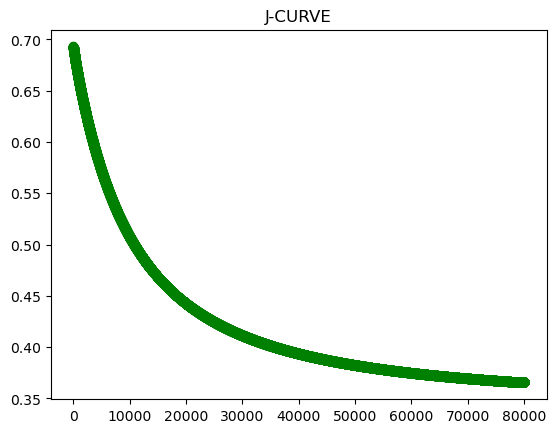

In [145]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################

# Print out the final weights
print('final weights are as follows:')
print(w)

# Plot the J curve w.r.t. the iteration numbers
plt.title('J-CURVE')
plt.scatter(np.arange(0, epoch_num), J, color="green")
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  

In [ ]:
#We can see a huge drop in the loss as we train the model for more number of epochs. As see above, there's a 
#huge difference from 10000 epochs to 60000 epochs. This decrease in loss indicates that the model is well trained.

## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


In [149]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################

confusion_matrix = metrics.confusion_matrix(y_test, predicted_y_value)
true_negative, false_positive, false_negative, true_positive = confusion_matrix.ravel()
print("Confusion matrix is as below")
print(f"TN: {tn} FP: {fp}\nFN: {fn} TP: {tp}")
accuracy = round(metrics.accuracy_score(y_test, predicted_y_value),2)
print("The accuracy is ", accuracy)
precision = round(metrics.precision_score(y_test, predicted_y_value),2)
print("The precision is ", precision)
recall = round(metrics.recall_score(y_test, predicted_y_value),2)
print("The recall is ", recall)
f1_score = round(metrics.f1_score(y_test, predicted_y_value),2)
print("The f1 score is ", f1_score)


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Confusion matrix is as below
TN: 13 FP: 4
FN: 1 TP: 15
The accuracy is  0.85
The precision is  0.79
The recall is  0.94
The f1 score is  0.86


## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [184]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################



# Pick the best model
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Reading data
p3_tr_d = pd.read_csv("P3train.txt", delimiter='\t', skiprows=[0], names=["f1", "f2", "y"])
p3_te_d = pd.read_csv("P3test.txt", delimiter='\t', skiprows=[0], names=["f1", "f2", "y"])

# Splitting features and labels
X_train, y_train = p3_tr_d[["f1", "f2"]], p3_tr_d["y"]
X_test, y_test = p3_te_d[["f1", "f2"]], p3_te_d["y"]

# Feature Engineering: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define parameter grids for Linear, Polynomial, and RBF kernels
param_grids = {
    'linear': {'C': [1, 10, 100]},
    'poly': {'C': [1, 10, 100], 'degree': [3, 4, 5], 'coef0': [0, 1]},
    'rbf': {'C': [1, 10, 100, 500], 'gamma': [0.001, 0.01, 0.1, 1]}
}

# Storing best results
best_accuracy = 0
final_weights = None

# Training and evaluating models with GridSearchCV for each kernel
for kernel, params in param_grids.items():
    if kernel == 'poly':
        model = SVC(kernel='poly')
        X_train_kernel, X_test_kernel = X_train_poly, X_test_poly
    else:
        model = SVC(kernel=kernel)  # Use RBF or Linear kernel
        X_train_kernel, X_test_kernel = X_train, X_test

    print(f"Evaluating kernel: {kernel}")
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_kernel, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {kernel} kernel: {grid_search.best_params_}")
    
    # Predicting on the test set
    y_pred = best_model.predict(X_test_kernel)
    
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Displaying results
    print(f"Accuracy: {round(accuracy,2)}")
    print(f"Precision: {round(precision,2)}")
    print(f"Recall: {round(recall,2)}")
    print(f"F1 Score: {round(f1,2)}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-" * 50)
    
    # Checking if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        final_weights = best_model.support_vectors_
        best_model_name = kernel

print("\n\n")
print("THE BEST MODEL IS  ", best_model_name, "!!")
print("\n\n")
# Print final weights (support vectors) for the best model
print("final weights:")
print(best_model.support_vectors_)




##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Evaluating kernel: linear
Best parameters for linear kernel: {'C': 1}
Accuracy: 0.45
Precision: 0.33
Recall: 0.12
F1 Score: 0.18
Confusion Matrix:
[[13  4]
 [14  2]]
--------------------------------------------------
Evaluating kernel: poly
Best parameters for poly kernel: {'C': 1, 'coef0': 1, 'degree': 3}
Accuracy: 0.82
Precision: 0.75
Recall: 0.94
F1 Score: 0.83
Confusion Matrix:
[[12  5]
 [ 1 15]]
--------------------------------------------------
Evaluating kernel: rbf
Best parameters for rbf kernel: {'C': 10, 'gamma': 1}
Accuracy: 0.85
Precision: 0.79
Recall: 0.94
F1 Score: 0.86
Confusion Matrix:
[[13  4]
 [ 1 15]]
--------------------------------------------------



THE BEST MODEL IS   rbf !!



final weights:
[[ 0.29896    0.61915  ]
 [ 0.82316    0.27558  ]
 [ 0.59274   -0.7405   ]
 [-0.13306   -0.4481   ]
 [-0.4038     0.70687  ]
 [ 0.28744   -0.76974  ]
 [-0.72062    0.53874  ]
 [ 0.60426    0.59722  ]
 [-0.28859   -0.060673 ]
 [ 0.22408    0.77997  ]
 [ 0.86348   -0.082602 

## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

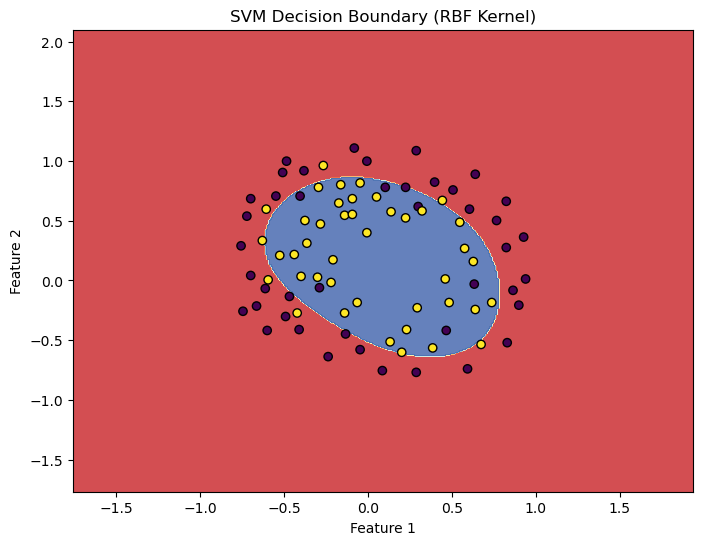

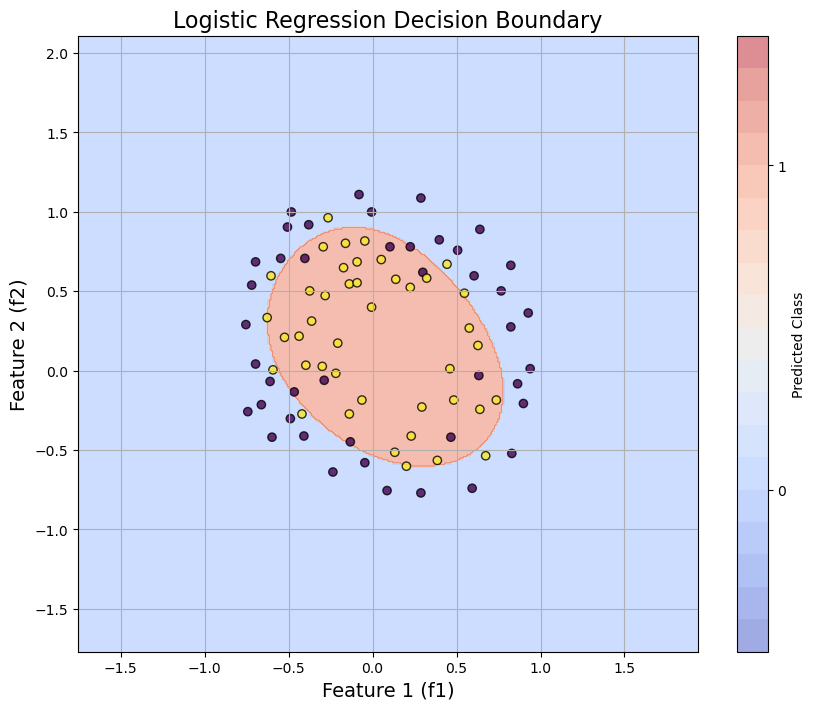

In [175]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train['f1'].min() - 1, X_train['f1'].max() + 1
y_min, y_max = X_train['f2'].min() - 1, X_train['f2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predicting using RBF SVM
Z_svm = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

# Plotting the decision boundary for RBF SVM
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_svm, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train['f1'], X_train['f2'], c=y_train, edgecolors='k', marker='o')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Create a mesh grid for plotting decision boundaries
feature1_min, feature1_max = p3_tr_d['f1'].min() - 1, p3_tr_d['f1'].max() + 1
feature2_min, feature2_max = p3_tr_d['f2'].min() - 1, p3_tr_d['f2'].max() + 1
xx_grid, yy_grid = np.meshgrid(np.arange(feature1_min, feature1_max, 0.01),
                                np.arange(feature2_min, feature2_max, 0.01))

# Create a feature matrix for the mesh grid
mesh_feature_matrix = np.c_[xx_grid.ravel(), yy_grid.ravel()]

# Prepare polynomial features for the mesh grid
mesh_poly_features = np.zeros((mesh_feature_matrix.shape[0], x_train.shape[1]))
for j in range(2 + 1):  # Adjust the range according to the power used in logistic regression
    for i in range(2 + 1):
        mesh_poly_features[:, j * 3 + i] = (mesh_feature_matrix[:, 0] ** i) * (mesh_feature_matrix[:, 1] ** j)

# Predicting the probabilities for the mesh grid using the logistic regression model
predicted_prob_mesh = sigm(np.dot(mesh_poly_features, w))

# Convert probabilities to binary predictions
Z_logistic = np.where(predicted_prob_mesh >= 0.5, 1, 0).reshape(xx_grid.shape)

# Plotting the decision boundary for Logistic Regression
plt.figure(figsize=(10, 8))
# Use a different color map and levels for clearer decision boundary visualization
contour = plt.contourf(xx_grid, yy_grid, Z_logistic, alpha=0.5, cmap=plt.cm.coolwarm, levels=np.arange(-0.5, 1.5, 0.1))
plt.colorbar(contour, ticks=[0, 1], label='Predicted Class')

# Overlay the training data
plt.scatter(p3_tr_d['f1'], p3_tr_d['f2'], c=p3_tr_d['y'], edgecolors='k', marker='o', label='Training Data', alpha=0.8)

# Titles and labels
plt.title('Logistic Regression Decision Boundary', fontsize=16)
plt.xlabel('Feature 1 (f1)', fontsize=14)
plt.ylabel('Feature 2 (f2)', fontsize=14)
plt.xlim(feature1_min, feature1_max)
plt.ylim(feature2_min, feature2_max)
plt.grid()
plt.show()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss which one has better performance and why.

**Your Answer:**  

In [186]:
#SVM was better Logistic Regression in this case. It was better at understanding the complex 
#patterns in the data, leading to more accurate predictions. While Logistic Regression is easier to interpret, 
#SVM's ability to handle non-linear relationships gave it a significant edge. 
#It may seem like both the decision boundaries are similar, but when looked carefully, we observe that
#SVM has a better decision boundary. SVM hence has better performance. 